<a href="https://colab.research.google.com/github/Gabriela2685/Simulacion1/blob/main/5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 5.3 Compra de autos

Carmen Gabriela Angulo Payán

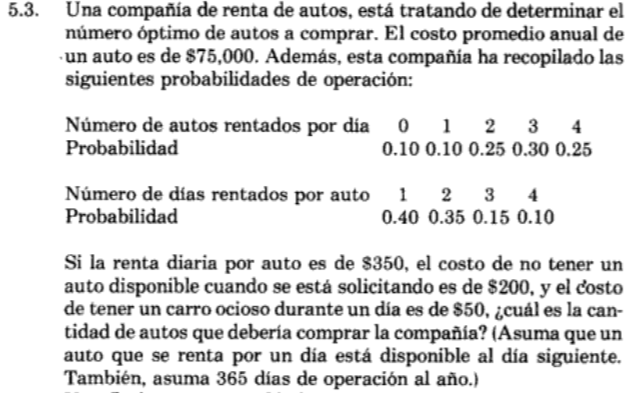

Al momento de correr esta primer función nos muestra el comportamiento de la renta de autos que se tuvo los 365 día de un año, en el que se muestra:

*   Cantidad de autos con que comenzamos
*   Demanda de los mismos
*   Demanda insatisfecha
*   Los días que se rentará cada uno
*   El día que regresarán*
*   Carros ociosos (Sin rentar)
*   Autos devueltos

En este caso, supusimos que los autos regresán un día después*

Por último se muestran las ganancias y los costos de dicho año.

In [ ]:
import random as rnd

In [ ]:
def no_autos(r, intervalos):  # Definimos una funcion que asigne el numero de demanda para cada dia
    for (inicio, fin, valor) in (intervalos):  # en los intervalos que despues se proponen, a traves de un num aleatorio R
        if inicio <= r < fin:
            return valor
    return

In [ ]:
def dias_rentado(rental_days, dias):  # Definimos una funcion que asigne el num de dias que se rentara cada auto
    for (inicio, fin, valor,) in (dias):  # en los intervalos que despues se proponen, a traves de un num aleatorio R
        if inicio <= rental_days < fin:
            return valor
    return

In [ ]:
def compra_autos(intervalos, dias, start, agregados):
    insuficiente = 0
    insuficiente_contador = 0
    ocioso_contador = 0
    autos_rentados = 0
    autos_devueltos = []  # Esta lista nos indicara el dia que deberan regresar los autos
    costo_compra = start * 75000

    for dia in range(1, 366):  # En un rango de 10 dias vemos como se comporta la funcion
        r = rnd.random()  # Num aleatorio
        rented_cars = no_autos(r, intervalos)  # Autos rentados

        days_rent = []
        if rented_cars > start:  # Si la demanda es mayor a los autos disponibles
            insuficiente = rented_cars - start  # Muestra los autos que no cubrimos
            insuficiente_contador += insuficiente
            for _ in range(start):
                rental_days = rnd.random() # Asigna el numero de dias que se rentaran los autos disponibles
                y = dias_rentado(rental_days, dias)  # para cada auto
                days_rent.append(y)  # Agregamos a la lista los días asignados
                autos_rentados += 1

        if rented_cars < start:
            insuficiente = 0  # Si contamos con la cantidad pedida la demanda insatisfecha sera 0
            for _ in range(rented_cars):  # Asignaremos los dias que se rentara cada auto
                rental_days = rnd.random()
                y = dias_rentado(rental_days, dias)
                days_rent.append(y)  # Los agragamos a la lista
                autos_rentados += 1


        for elemento in days_rent:  # Itera sobre los dias que se rento cada auto
            dia_a_devolver = elemento + dia  # Suma los dias de renta más el dia actual
            autos_devueltos.append(dia_a_devolver)  # Los agrega a la lista

        Ocioso = start - rented_cars # Ocioso sera igual los carros con los que iniciamos menos los que se rentaron

        if (Ocioso < 0):  # Si ocioso es negativo quiere decir que no hay carros sin rentarse
            Ocioso = 0  # por lo que sera 0
        else:
          ocioso_contador += Ocioso

        print(f"Día: {dia},Inicio: {start}, Demanda: {rented_cars}, Insuf: {insuficiente}, Dias a rentar: {days_rent}, Dia que se devolveran: {autos_devueltos}, Ocioso: {Ocioso}")

        print(f'Autos devueltos {autos_devueltos.count(dia)}')
        print()


        if (autos_devueltos.count(dia) == 0):
            start = Ocioso

        if (autos_devueltos.count(dia) >= 1):
            start = Ocioso + autos_devueltos.count(dia)

        while dia in autos_devueltos:
            autos_devueltos.remove(dia)

    print('Autos:', costo_compra / 75000, 'Costo:', costo_compra)
    print('Autos insuficiente:', insuficiente_contador, 'Costo:', insuficiente_contador * 200)
    print('Autos ocioso:', ocioso_contador, 'Costo:', ocioso_contador * 50)
    print('Autos rentado:', autos_rentados, 'Ganancia:', autos_rentados * 350)

    return


if __name__ == "__main__":
# Dependiendo de donde caiga mi R son los autos rentados
    intervalos = [
        (0.00, 0.10, 0),
        (0.10, 0.20, 1),
        (0.20, 0.45, 2),
        (0.45, 0.75, 3),
        (0.75, 1.00, 4),
    ]

# Dependiendo de donde caiga mi R son los dias rentados
    dias = [
        (0.00, 0.40, 1),
        (0.40, 0.75, 2),
        (0.75, 0.90, 3),
        (0.90, 1.00, 4),
    ]
    start = 6  # Iniciamos con _ autos
    agregados = 0

In [ ]:
compra_autos(intervalos, dias, start, agregados)

Día: 1,Inicio: 6, Demanda: 4, Insuf: 0, Dias a rentar: [1, 1, 3, 1], Dia que se devolveran: [2, 2, 4, 2], Ocioso: 2
Autos devueltos 0

Día: 2,Inicio: 2, Demanda: 4, Insuf: 2, Dias a rentar: [1, 1], Dia que se devolveran: [2, 2, 4, 2, 3, 3], Ocioso: 0
Autos devueltos 3

Día: 3,Inicio: 3, Demanda: 3, Insuf: 2, Dias a rentar: [], Dia que se devolveran: [4, 3, 3], Ocioso: 0
Autos devueltos 2

Día: 4,Inicio: 2, Demanda: 2, Insuf: 2, Dias a rentar: [], Dia que se devolveran: [4], Ocioso: 0
Autos devueltos 1

Día: 5,Inicio: 1, Demanda: 3, Insuf: 2, Dias a rentar: [1], Dia que se devolveran: [6], Ocioso: 0
Autos devueltos 0

Día: 6,Inicio: 0, Demanda: 0, Insuf: 2, Dias a rentar: [], Dia que se devolveran: [6], Ocioso: 0
Autos devueltos 1

Día: 7,Inicio: 1, Demanda: 4, Insuf: 3, Dias a rentar: [3], Dia que se devolveran: [10], Ocioso: 0
Autos devueltos 0

Día: 8,Inicio: 0, Demanda: 3, Insuf: 3, Dias a rentar: [], Dia que se devolveran: [10], Ocioso: 0
Autos devueltos 0

Día: 9,Inicio: 0, Demand

Es este siguiente apartado realizamos una simulación durante 5 años, donde vemos las ganancias y costos de dichjos años, con el fin de ver si es necesario comprar más o menos autos para tener una mayor utilidad.

La razón por la que la cantidad de autos comprados sea de 6, es que a partir de esta cantidad no necesitamos comprar más autos, que recordemos tienen un precio de $75,000, pues de lo contraría comenzaría a ser un gasto inecesario.

Autos comprados $<$ 6 Necesitamos comprar más autos

Autos comprados $\geq$ 6 No necesitamos comprar más

In [ ]:
def compra_autos(intervalos, dias, start, duracion):
    insuficiente_contador = 0
    ocioso_contador = 0
    autos_rentados = 0
    autos_devueltos = []
    costo_compra = start * 75000

    for dia in range(1, duracion + 1):
        r = rnd.random()
        rented_cars = no_autos(r, intervalos)

        days_rent = []
        if rented_cars > start:
            insuficiente = rented_cars - start
            insuficiente_contador += insuficiente
            for _ in range(start):
                rental_days = rnd.random()
                y = dias_rentado(rental_days, dias)
                days_rent.append(y)
                autos_rentados += 1

        elif rented_cars <= start:
            insuficiente = 0
            for _ in range(rented_cars):
                rental_days = rnd.random()
                y = dias_rentado(rental_days, dias)
                days_rent.append(y)
                autos_rentados += 1

        for elemento in days_rent:
            dia_a_devolver = elemento + dia
            autos_devueltos.append(dia_a_devolver)

        Ocioso = start - rented_cars
        if Ocioso < 0:
            Ocioso = 0
        else:
            ocioso_contador += Ocioso

        if autos_devueltos.count(dia) == 0:
            start = Ocioso

        if autos_devueltos.count(dia) >= 1:
            start = Ocioso + autos_devueltos.count(dia)

        while dia in autos_devueltos:
            autos_devueltos.remove(dia)

    ganancia = autos_rentados * 350
    costo_insuficiente = insuficiente_contador * 200
    costo_ocioso = ocioso_contador * 50
    costo_total = costo_compra + costo_insuficiente + costo_ocioso

    print('Autos:', costo_compra / 75000, 'Costo:', costo_compra)
    print('Autos insuficientes:', insuficiente_contador, 'Costo:', costo_insuficiente)
    print('Autos ociosos:', ocioso_contador, 'Costo:', costo_ocioso)
    print('Autos rentados:', autos_rentados, 'Ganancia:', ganancia)
    print('Costo Total:', costo_total)

    return insuficiente_contador, ocioso_contador

if __name__ == "__main__":
    intervalos = [
        (0.00, 0.10, 0),
        (0.10, 0.20, 1),
        (0.20, 0.45, 2),
        (0.45, 0.75, 3),
        (0.75, 1.00, 4),
    ]

    dias = [
        (0.00, 0.40, 1),
        (0.40, 0.75, 2),
        (0.75, 0.90, 3),
        (0.90, 1.00, 4),
    ]

    start = 6  # Iniciamos con 6 autos
    agregados = 0
    duracion = 365  # Duración en días

    insuficientes_totales = 0
    ociosos_totales = 0

    for periodo in range(1, 6):  # Simulamos 5 periodos años
        print(f"\nPeriodo {periodo}")
        insuficientes, ociosos = compra_autos(intervalos, dias, start, duracion)
        insuficientes_totales += insuficientes
        ociosos_totales += ociosos

    print("\nResultados Totales:")
    print(f"Autos insuficientes totales: {insuficientes_totales}")
    print(f"Autos ociosos totales: {ociosos_totales}")
    print()

    # Decisión de compra basada en los resultados totales
    if insuficientes_totales > ociosos_totales:
        print("Recomendación: Considera comprar más autos.")
    else:
        print("Recomendación: No es necesario comprar más autos.")



Periodo 1
Autos: 5.0 Costo: 375000
Autos insuficientes: 342 Costo: 68400
Autos ociosos: 231 Costo: 11550
Autos rentados: 534 Ganancia: 186900
Costo Total: 454950

Periodo 2
Autos: 5.0 Costo: 375000
Autos insuficientes: 351 Costo: 70200
Autos ociosos: 186 Costo: 9300
Autos rentados: 562 Ganancia: 196700
Costo Total: 454500

Periodo 3
Autos: 5.0 Costo: 375000
Autos insuficientes: 347 Costo: 69400
Autos ociosos: 214 Costo: 10700
Autos rentados: 545 Ganancia: 190750
Costo Total: 455100

Periodo 4
Autos: 5.0 Costo: 375000
Autos insuficientes: 383 Costo: 76600
Autos ociosos: 144 Costo: 7200
Autos rentados: 572 Ganancia: 200200
Costo Total: 458800

Periodo 5
Autos: 5.0 Costo: 375000
Autos insuficientes: 358 Costo: 71600
Autos ociosos: 164 Costo: 8200
Autos rentados: 556 Ganancia: 194600
Costo Total: 454800

Resultados Totales:
Autos insuficientes totales: 1781
Autos ociosos totales: 939

Recomendación: Considera comprar más autos.
